In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#(evaluations:)
%matplotlib inline
pd.set_option('display.max_columns',None)
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error,accuracy_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline

In [4]:
data=pd.read_csv('heart.csv')

In [5]:
df=data.copy()

In [6]:
# df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df['target'].value_counts()


1    165
0    138
Name: target, dtype: int64

In [8]:
X=df.iloc[:,:-1]#except target
Y=df.iloc[:,[-1]]#target


In [9]:
print('Target classes',Y.values.reshape(-1))

Target classes [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y.values.reshape(-1), test_size=0.30, 
                                                    random_state=21)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 13)
(91, 13)
(212,)
(91,)


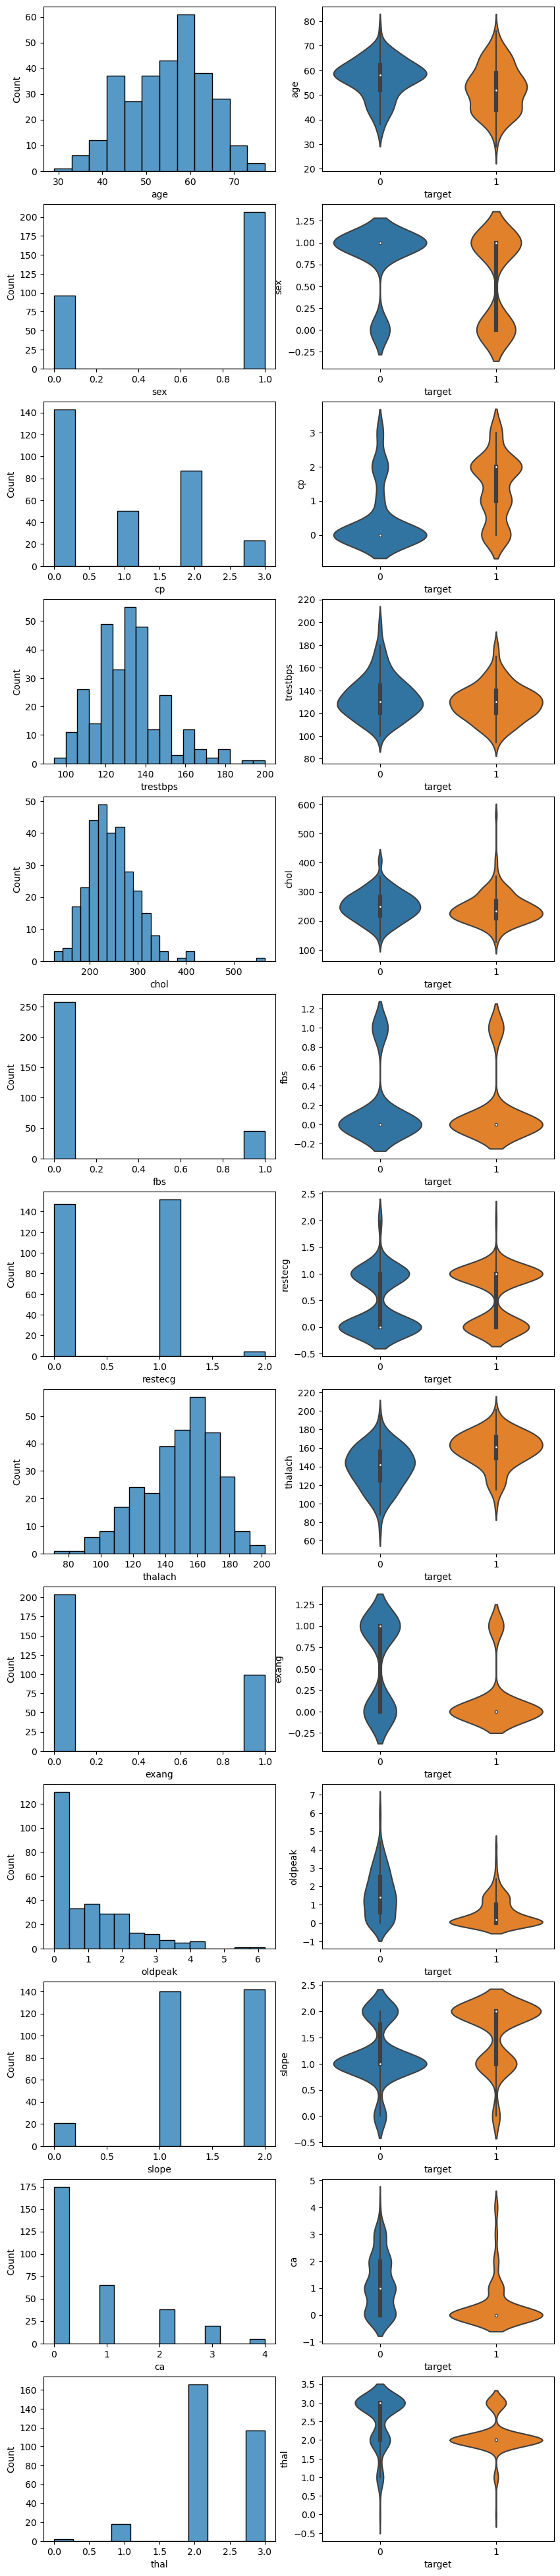

In [12]:
X_cols=X.columns
fig,axes=plt.subplots(len(X_cols),2,figsize=(10,50))
for i,j in enumerate(X_cols):
    sns.histplot(X[j], kde=False, ax=axes[i][0])
    sns.violinplot(x=Y['target'], y=X[j], ax=axes[i][1])

<AxesSubplot:>

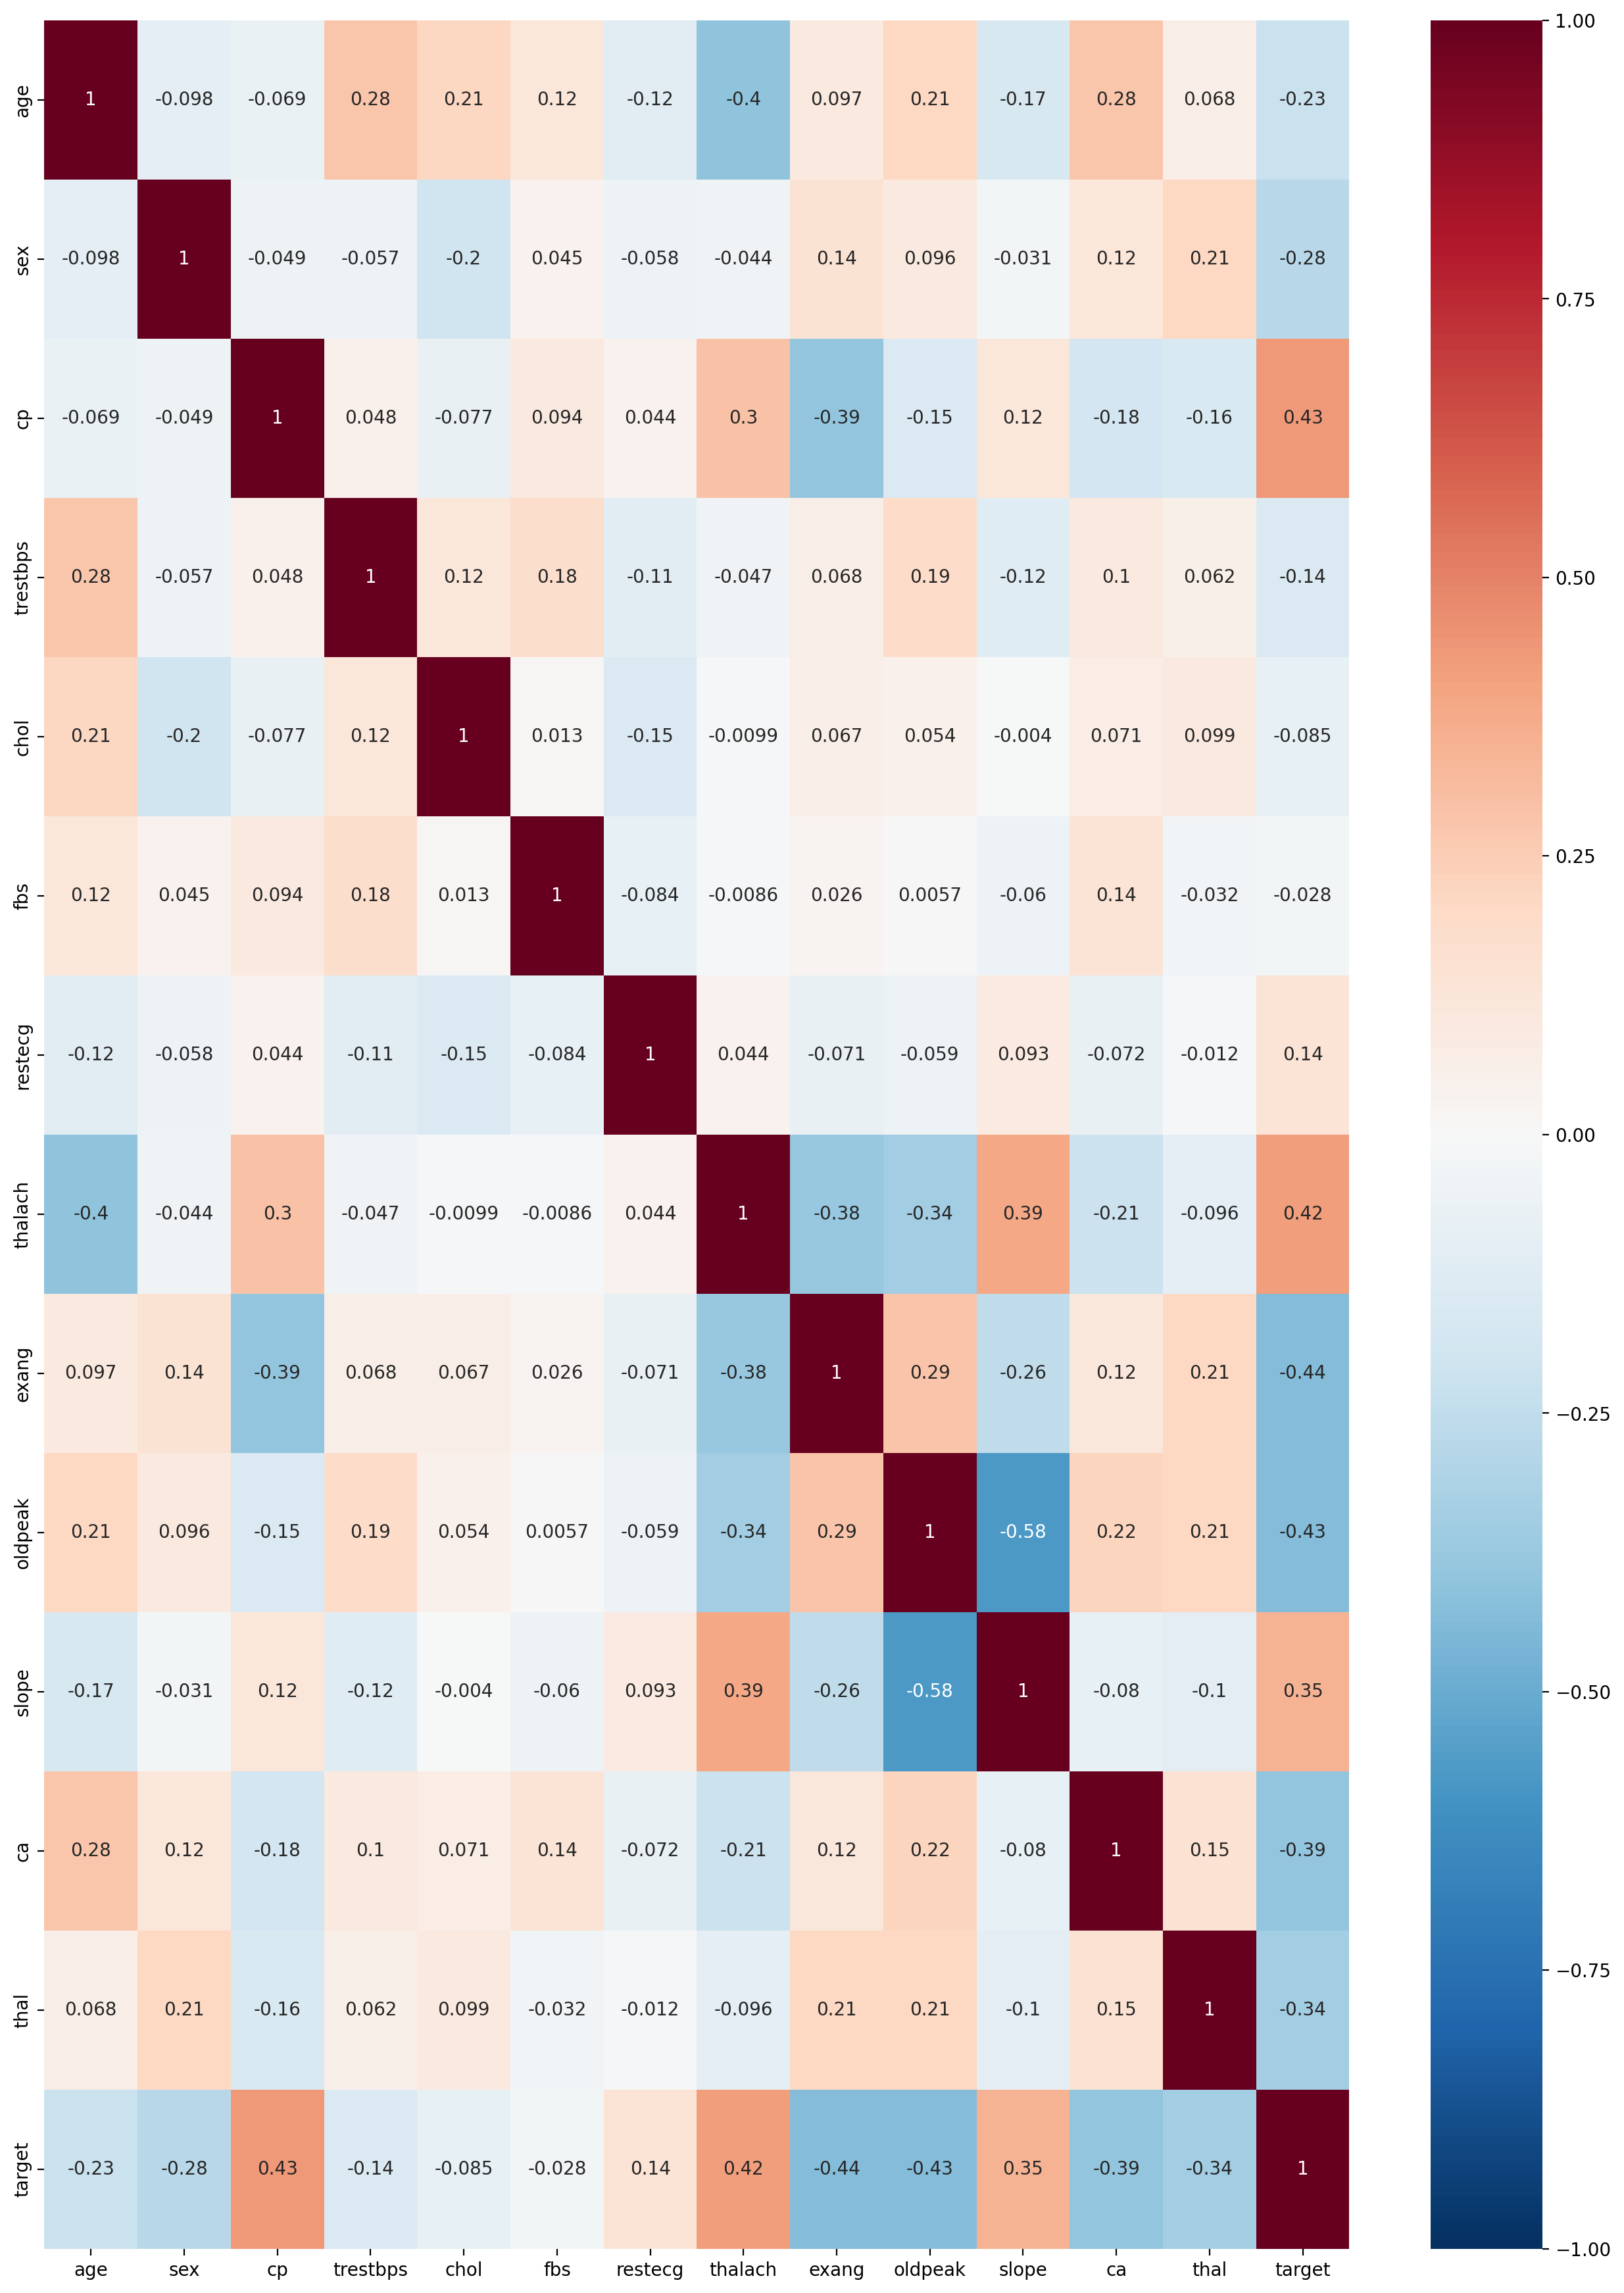

In [13]:
corr_matrix=df.corr()
plt.figure(figsize=(16,22),dpi=200)
sns.heatmap(corr_matrix, annot=True, vmin=-1,vmax=1,center=0,cmap='RdBu_r')

<H1>Modelling.SVM Classifier with Linear Kernel

In [14]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear") 
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [15]:
classifier.intercept_

array([2.77917173])

In [16]:
classifier.coef_

array([[-0.00772489, -1.1467404 ,  0.62345276, -0.01356754, -0.00247973,
         0.06259847,  0.16342719,  0.01957122, -0.53081528, -0.36620941,
         0.39992299, -0.44987008, -0.99709067]])

In [17]:
y_pred=classifier.predict(X_test)
y_pred


array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0], dtype=int64)

In [18]:
#Confusion matrix
print('Confusion matrix:',confusion_matrix(y_test, y_pred))
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Precision Score:',metrics.precision_score(y_test, y_pred))
print('Recall Score:',metrics.recall_score(y_test, y_pred))

Confusion matrix: [[36  7]
 [ 5 43]]
Accuracy Score: 0.8681318681318682
Precision Score: 0.86
Recall Score: 0.8958333333333334


In [19]:
print('Classification Report for SVM:\n',metrics.classification_report(y_test,y_pred))

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86        43
           1       0.86      0.90      0.88        48

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



<AxesSubplot:>

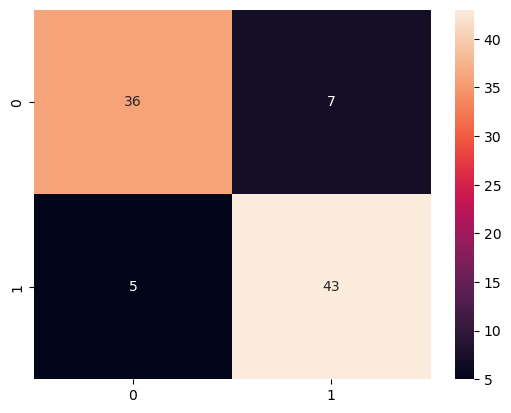

In [20]:
#Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

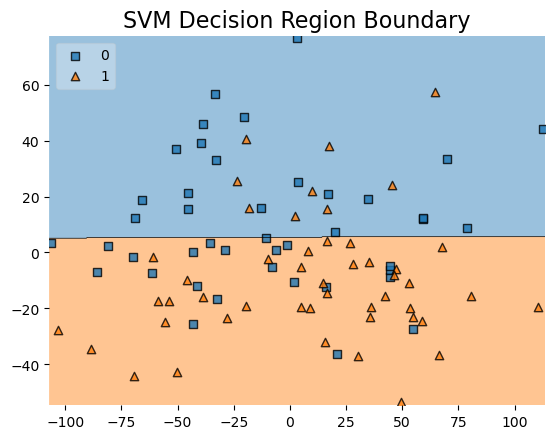

In [21]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
pca=PCA(n_components=2)
X_train2=pca.fit_transform(X_train)
X_test2=pca.fit_transform(X_test)
classifier.fit(X_train2, y_train)

plot_decision_regions(X_test2, y_test.reshape(-1,), clf=classifier, legend=2)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

<H1>Support Vector Machines-Kernel RBF

In [22]:
#Fit SCV Classifier
from sklearn.svm import SVC
classifier=SVC(kernel="rbf") 
classifier.fit(X_train,y_train)
#predict
y_pred=classifier.predict(X_test)
from sklearn import metrics
print('Confusion matrix:',confusion_matrix(y_test, y_pred))
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Precision Score:',metrics.precision_score(y_test, y_pred))
print('Recall Score:',metrics.recall_score(y_test, y_pred))

Confusion matrix: [[22 21]
 [10 38]]
Accuracy Score: 0.6593406593406593
Precision Score: 0.6440677966101694
Recall Score: 0.7916666666666666


In [23]:
print('Classification Report for SVM:\n',metrics.classification_report(y_test,y_pred))

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.69      0.51      0.59        43
           1       0.64      0.79      0.71        48

    accuracy                           0.66        91
   macro avg       0.67      0.65      0.65        91
weighted avg       0.66      0.66      0.65        91



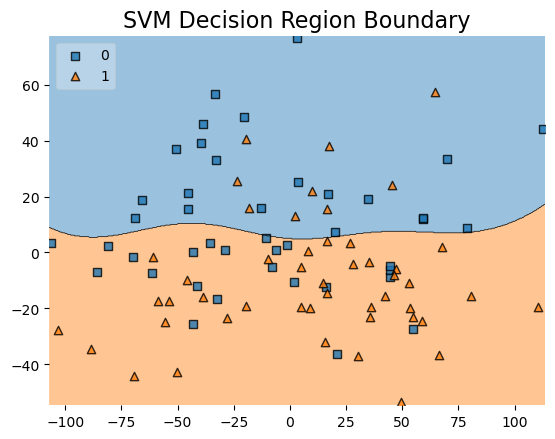

In [24]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
pca=PCA(n_components=2)
X_train2=pca.fit_transform(X_train)
X_test2=pca.fit_transform(X_test)
classifier.fit(X_train2, y_train)

plot_decision_regions(X_test2, y_test.reshape(-1,), clf=classifier, legend=2)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

<H1>Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0, solver='liblinear')
classifier.fit(X_train, y_train)
#predict
y_pred=classifier.predict(X_test)
# from sklearn import metrics

# Confusion matrix
print('Confusion matrix:',confusion_matrix(y_test, y_pred))
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Precision Score:',metrics.precision_score(y_test, y_pred))
print('Recall Score:',metrics.recall_score(y_test, y_pred))

Confusion matrix: [[36  7]
 [ 9 39]]
Accuracy Score: 0.8241758241758241
Precision Score: 0.8478260869565217
Recall Score: 0.8125


In [26]:
print('Classification Report for Logistic Regression:\n',metrics.classification_report(y_test,y_pred))

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        43
           1       0.85      0.81      0.83        48

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



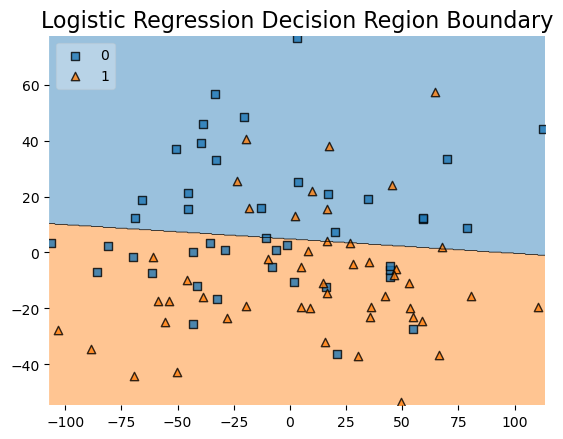

In [27]:
from sklearn.decomposition import PCA
# from mlxtend.plotting import plot_decision_regions
pca=PCA(n_components=2)
X_train2=pca.fit_transform(X_train)
X_test2=pca.fit_transform(X_test)
classifier.fit(X_train2, y_train)

plot_decision_regions(X_test2, y_test.reshape(-1,), clf=classifier, legend=2)
plt.title('Logistic Regression Decision Region Boundary', size=16)
plt.show()

<H1>Decision Tree

In [28]:
#Fit the classifier
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
#Evaluate the model performance
# Confusion matrix
print('Confusion matrix:',confusion_matrix(y_test, y_pred))
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Precision Score:',metrics.precision_score(y_test, y_pred))
print('Recall Score:',metrics.recall_score(y_test, y_pred))


Confusion matrix: [[34  9]
 [14 34]]
Accuracy Score: 0.7472527472527473
Precision Score: 0.7906976744186046
Recall Score: 0.7083333333333334


In [29]:
print('Classification Report for Decision Tree:\n',metrics.classification_report(y_test,y_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75        43
           1       0.79      0.71      0.75        48

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



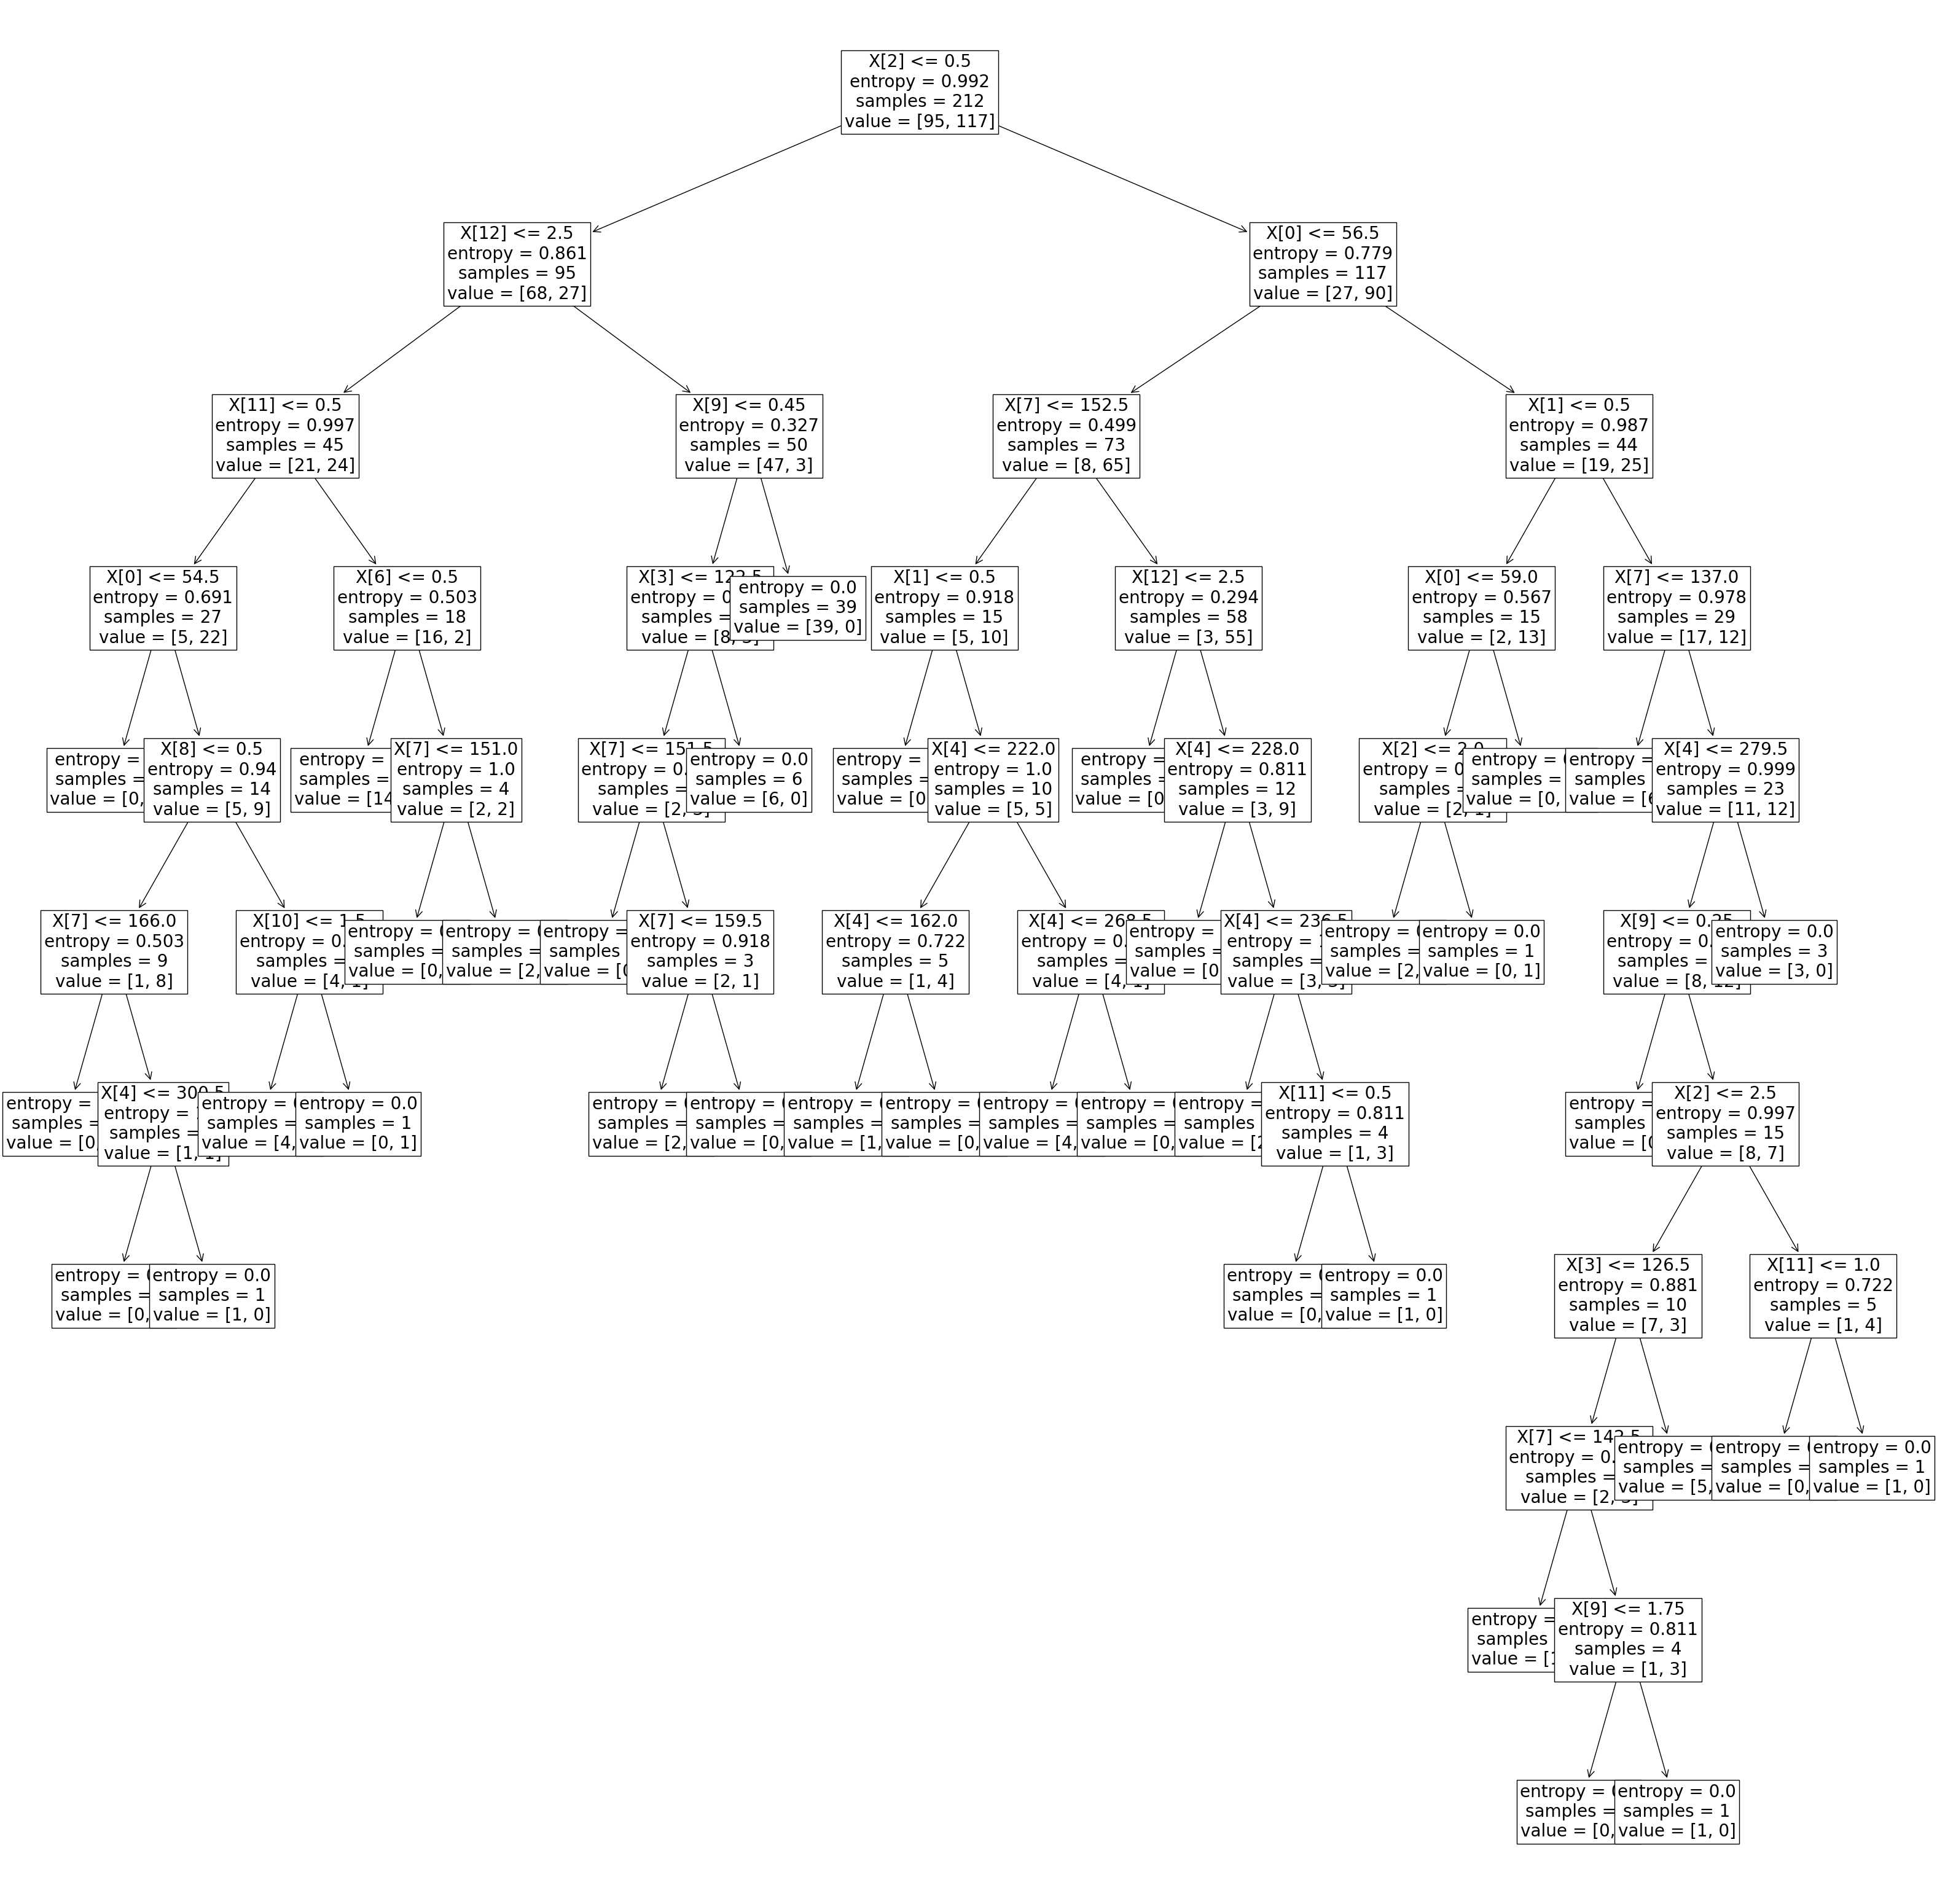

In [30]:
from sklearn import tree
fig, axes =plt.subplots(figsize=(40,40))
tree.plot_tree(classifier.fit(X_train,y_train), max_depth=20, fontsize=20)
plt.show()

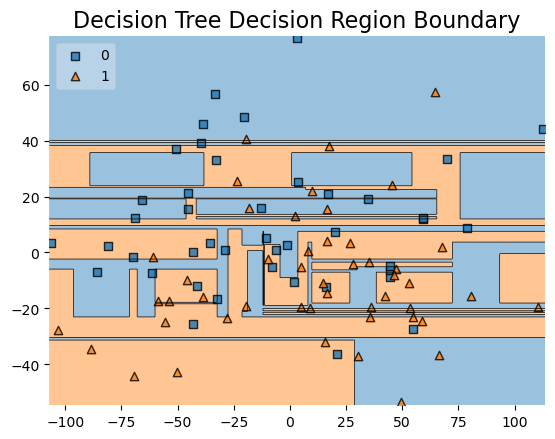

In [31]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
pca=PCA(n_components=2)

X_train2=pca.fit_transform(X_train)
X_test2=pca.fit_transform(X_test)

classifier.fit(X_train2, y_train)

plot_decision_regions(X_test2, y_test.reshape(-1,), clf=classifier, legend=2)
plt.title('Decision Tree Decision Region Boundary', size=16)
plt.show()

<H1>Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
#Evaluate the model performance
# Confusion matrix
print('Confusion matrix:',confusion_matrix(y_test, y_pred))
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Precision Score:',metrics.precision_score(y_test, y_pred))
print('Recall Score:',metrics.recall_score(y_test, y_pred))


Confusion matrix: [[37  6]
 [12 36]]
Accuracy Score: 0.8021978021978022
Precision Score: 0.8571428571428571
Recall Score: 0.75


In [33]:
print('Classification Report for Random Forest:\n',metrics.classification_report(y_test,y_pred))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.76      0.86      0.80        43
           1       0.86      0.75      0.80        48

    accuracy                           0.80        91
   macro avg       0.81      0.81      0.80        91
weighted avg       0.81      0.80      0.80        91



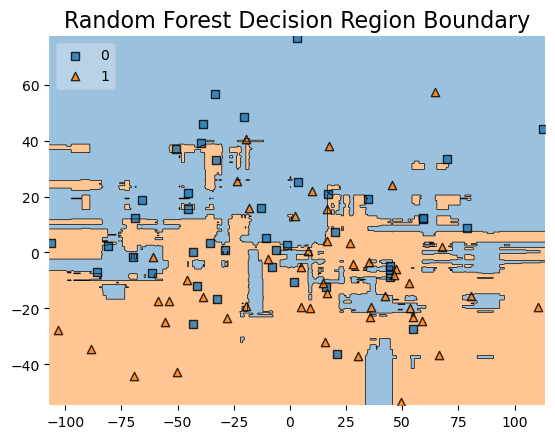

In [34]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
pca=PCA(n_components=2)

X_train2=pca.fit_transform(X_train)
X_test2=pca.fit_transform(X_test)

classifier.fit(X_train2, y_train)

plot_decision_regions(X_test2, y_test.reshape(-1,), clf=classifier, legend=2)
plt.title('Random Forest Decision Region Boundary', size=16)
plt.show()

<H1>KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=2)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
#Evaluate the model performance
# Confusion matrix
print('Confusion matrix:',confusion_matrix(y_test, y_pred))
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Precision Score:',metrics.precision_score(y_test, y_pred))
print('Recall Score:',metrics.recall_score(y_test, y_pred))


Confusion matrix: [[30 13]
 [13 35]]
Accuracy Score: 0.7142857142857143
Precision Score: 0.7291666666666666
Recall Score: 0.7291666666666666


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [36]:
print('Classification Report for KNN:\n',metrics.classification_report(y_test,y_pred))

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70        43
           1       0.73      0.73      0.73        48

    accuracy                           0.71        91
   macro avg       0.71      0.71      0.71        91
weighted avg       0.71      0.71      0.71        91



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


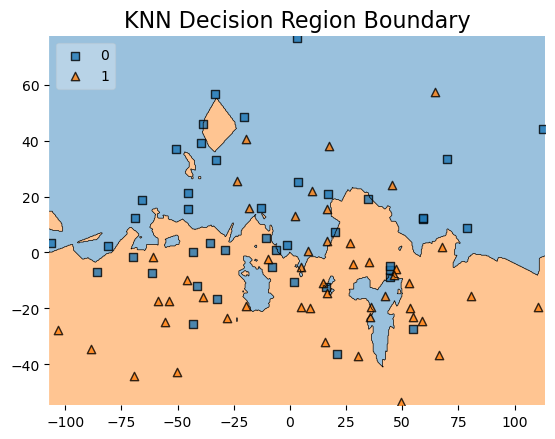

In [37]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
pca=PCA(n_components=2)

X_train2=pca.fit_transform(X_train)
X_test2=pca.fit_transform(X_test)

classifier.fit(X_train2, y_train)

plot_decision_regions(X_test2, y_test.reshape(-1,), clf=classifier, legend=2)
plt.title('KNN Decision Region Boundary', size=16)
plt.show()

<H1>Naive Bayes Classifier

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
#Evaluate the model performance
# Confusion matrix
print('Confusion matrix:',confusion_matrix(y_test, y_pred))
print('Accuracy Score:',accuracy_score(y_test, y_pred))
print('Precision Score:',metrics.precision_score(y_test, y_pred))
print('Recall Score:',metrics.recall_score(y_test, y_pred))


Confusion matrix: [[37  6]
 [11 37]]
Accuracy Score: 0.8131868131868132
Precision Score: 0.8604651162790697
Recall Score: 0.7708333333333334


In [39]:
print('Classification Report for Naive Bayes:\n',metrics.classification_report(y_test,y_pred))

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81        43
           1       0.86      0.77      0.81        48

    accuracy                           0.81        91
   macro avg       0.82      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91



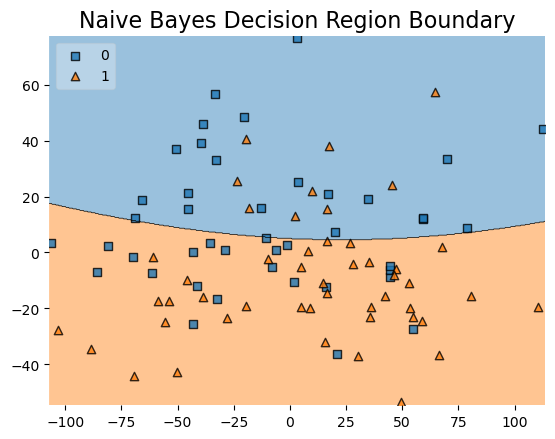

In [40]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
pca=PCA(n_components=2)

X_train2=pca.fit_transform(X_train)
X_test2=pca.fit_transform(X_test)

classifier.fit(X_train2, y_train)

plot_decision_regions(X_test2, y_test.reshape(-1,), clf=classifier, legend=2)
plt.title('Naive Bayes Decision Region Boundary', size=16)
plt.show()